# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [58]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [59]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    return [i*j for i,j in zip(a,b)]

---

In [60]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [61]:
# Define a scalar: bias b
my_b = -5

In [62]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x, weights)) + bias

---

In [63]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [64]:
# Import exp() function (safe on lists)
from numpy import exp

In [65]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return 1/(1+exp(-z))

---

In [66]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [67]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

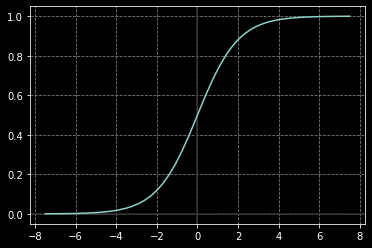

In [68]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.5', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [69]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(sum(mul(x, weights)) + bias)

---

In [70]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [71]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    # We can represent the boundary of OR function as the line which has equation x1 + x2 - 0.5 = 0.
    # So the weights are [1,1] and bias is -0.5.
    return 1 if x[0] + x[1] - 0.5>0 else 0

---

In [72]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [73]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [74]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    # We can represent the boundary of AND function as the line which has equation x1 + x2 - 1.5 = 0.
    # So the weights are [1,1] and bias is -1.5.
    return 1 if x[0] + x[1] - 1.5>0 else 0

---

In [75]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [76]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    # -x + 0.5 can represent the NOT functionality.
    # Weight is -1 and the bias term is 0.5.
    return 1 if -x[0] + 0.5>0 else 0

---

In [77]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [78]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    # Sİmply return OR(AND(x1_, x2,), AND(x1, x2_))
    return or_neuron([and_neuron([not_neuron([x[0]]), x[1]]), and_neuron([x[0],not_neuron([x[1]])])])

---

In [79]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [80]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️
def half_adder(x):
    """
    Return Sum, Carry where Sum = x1 XOR x2 and Carry = x1 AND x2
    """
    return xor_neuron(x), and_neuron(x)

In [81]:
print('Checking half_adder output')
for my_x in my_x_collection:
    print(my_x, f'{half_adder(my_x)}')

Checking half_adder output
[0, 0] (0, 0)
[0, 1] (1, 0)
[1, 0] (1, 0)
[1, 1] (0, 1)


![Adder](res/adder_circuit.png)

In [82]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️
def adder(x):
    """
    Returns Sum, Cout
    """
    temp_sum, temp_carry = half_adder(x[:2])
    temp_result = half_adder([temp_sum, x[2]])
    return temp_result[0], or_neuron([temp_result[1], temp_carry])

In [83]:
print('Checking adder output')
my_x_collection = [
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
]
for my_x in my_x_collection:
    print(my_x, f'{adder(my_x)}')

Checking adder output
[0, 0, 0] (0, 0)
[0, 0, 1] (1, 0)
[0, 1, 0] (1, 0)
[0, 1, 1] (0, 1)
[1, 0, 0] (1, 0)
[1, 0, 1] (0, 1)
[1, 1, 0] (0, 1)
[1, 1, 1] (1, 1)
